In [1]:
import pandas as pd

import statsmodels.api as sm

from patsy import dmatrices

F:\anoconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
url='http://vincentarelbundock.github.com/Rdatasets/csv/HistData/Guerry.csv'

df = pd.read_csv(url)

,Unnamed: 0,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,1,E,Ain,28870,15890,37,5098,33120,35039,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,2,N,Aisne,26226,5521,51,8901,14572,12831,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,3,C,Allier,26747,7925,13,10973,17044,114121,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,...,22,23,64,79,35,7,1,320.280,5549,129.10
5,6,7,S,Ardeche,9474,10263,27,3188,42117,52547,...,76,47,67,70,19,62,1,279.413,5529,340.73
6,7,8,N,Ardennes,35203,8847,67,6400,16106,26198,...,53,85,49,31,62,9,83,105.694,5229,289.62
7,8,9,S,Ariege,6173,9597,18,3542,22916,123625,...,74,28,63,75,22,77,3,385.313,4890,253.12
8,9,10,E,Aube,19602,4086,59,3608,18642,10989,...,77,54,9,28,86,15,207,83.244,6004,246.36
9,10,11,S,Aude,15647,10431,34,2582,20225,66498,...,80,35,27,50,63,48,1,370.949,6139,270.13


In [4]:
print(df.head())

   Unnamed: 0  dept Region    Department  Crime_pers  Crime_prop  Literacy  \
0           1     1      E           Ain       28870       15890        37   
1           2     2      N         Aisne       26226        5521        51   
2           3     3      C        Allier       26747        7925        13   
3           4     4      E  Basses-Alpes       12935        7289        46   
4           5     5      E  Hautes-Alpes       17488        8174        69   

   Donations  Infants  Suicides   ...    Crime_parents  Infanticide  \
0       5098    33120     35039   ...               71           60   
1       8901    14572     12831   ...                4           82   
2      10973    17044    114121   ...               46           42   
3       2733    23018     14238   ...               70           12   
4       6962    23076     16171   ...               22           23   

   Donation_clergy  Lottery  Desertion  Instruction  Prostitutes  Distance  \
0               69       4

In [7]:
vars = ['Department','Lottery','Literacy','Wealth','Region']
df = df[vars]
print (df)

             Department  Lottery  Literacy  Wealth Region
0                   Ain       41        37      73      E
1                 Aisne       38        51      22      N
2                Allier       66        13      61      C
3          Basses-Alpes       80        46      76      E
4          Hautes-Alpes       79        69      83      E
5               Ardeche       70        27      84      S
6              Ardennes       31        67      33      N
7                Ariege       75        18      72      S
8                  Aube       28        59      14      E
9                  Aude       50        34      17      S
10              Aveyron       81        31      50      S
11     Bouches-du-Rhone        3        38       2      S
12             Calvados       13        52      10      N
13               Cantal       82        31      59      C
14             Charente       60        36      86      W
15  Charente-Inferieure       35        39      18      W
16            

In [9]:
df = df.dropna()
df

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E
5,Ardeche,70,27,84,S
6,Ardennes,31,67,33,N
7,Ariege,75,18,72,S
8,Aube,28,59,14,E
9,Aude,50,34,17,S


In [12]:
y,X=dmatrices('Lottery~Literacy+Wealth+Region',data=df,return_type='dataframe')
X

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0
5,1.0,0.0,0.0,1.0,0.0,27.0,84.0
6,1.0,0.0,1.0,0.0,0.0,67.0,33.0
7,1.0,0.0,0.0,1.0,0.0,18.0,72.0
8,1.0,1.0,0.0,0.0,0.0,59.0,14.0
9,1.0,0.0,0.0,1.0,0.0,34.0,17.0


In [13]:
mod =sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           1.07e-05
Time:                        10:55:50   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [17]:
print (sm.stats.linear_rainbow(res))

(0.84723399761569129, 0.69979655436216426)


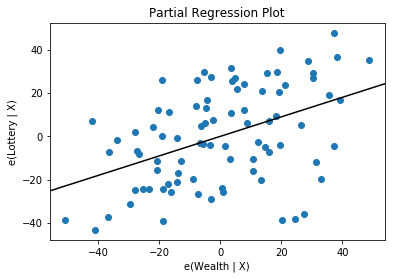

In [19]:
sm.graphics.plot_partregress('Lottery','Wealth',['Region','Literacy'],data=df,obs_labels=False)